# Lung Vasculature Analysis
This notebook (.ipynb) is a working project for analyzing lung vasculature. It inculdes three parts:
1. converts skeleton analytical output (.xml) into .csv file.  
2. calulates the length and average thickness of each segment.
3. makes two types of plots: 
    1. histogram of each dataset on length and thickness
    2. average histogram on length and thickness (line plot with error bars)


In [1]:
%load_ext autoreload
%autoreload 2
import os, sys, re, io
import numpy as np
import pandas as pd
from tqdm import tqdm
import time
from core.fileop import DirCheck, ListFiles
import core.mkplot as mkplot 

 ## Part 1: 
 Converting skeleton analytical output (.xml) into .csv file.
 * Inputs: *.xml 
 * Outputs: *.csv
 * Dependencies: xml, time, pandas, tqdm </br>
 
 * *.xml file includes three sheets: nodes, points, and segments. 
 * Warning: the progress bar controled by `tqdm` is not functioning well. It can not overwrite itself and creates multiple lines. 

### Functions

In [2]:
# import dependencies
import xml.etree.ElementTree as etree
from core.msxml import MSXmlReader

# function
def convert_xml_csv(ippath, oppath):
    filelist, fileabslist = ListFiles(ippath, extension='.xml')
    
    for idx, f in enumerate(filelist):
        filename = f.replace('.xml', '')
        ip = os.path.join(ippath, f) 
        op = os.path.join(oppath, filename)
        
        print(ip)
        print(op)

        # create path
        if filename not in os.listdir(oppath):
            DirCheck(op)
            
            # convert *.xml to *.csv 
            csv_all = MSXmlReader(ip)
            
            # save each spreadsheet into individual *.csv file
            for key, value in csv_all.items():
                oppath_tmp = os.path.join(op, key + '.csv')
                value.to_csv(oppath_tmp, index = False)


### Execution
To run the code, please change `path` to the directory hosts the raw data. 

In [3]:
path = '/Volumes/LaCie_DataStorage/Woo-lungs/2019'
ipdir = 'raw'
opdir = 'csv'
ippath = os.path.join(path, ipdir)
oppath = os.path.join(path, opdir)
# make dir
DirCheck(oppath)

# convert files in batch
convert_xml_csv(ippath, oppath)


/Volumes/LaCie_DataStorage/Woo-lungs/2019/raw/10_Hypoxia6-2.xml
/Volumes/LaCie_DataStorage/Woo-lungs/2019/csv/10_Hypoxia6-2


  8%|▊         | 40818/505888 [00:00<00:01, 408176.50it/s]

<Element '{urn:schemas-microsoft-com:office:spreadsheet}Workbook' at 0x7fa449843d18>
loading time: 13.312196969985962


100%|██████████| 31231/31231 [00:00<00:00, 444664.25it/s]


/Volumes/LaCie_DataStorage/Woo-lungs/2019/raw/11_FOR3-DFF-Normoxia.xml
/Volumes/LaCie_DataStorage/Woo-lungs/2019/csv/11_FOR3-DFF-Normoxia


 39%|███▊      | 38889/100975 [00:00<00:00, 388878.32it/s]

<Element '{urn:schemas-microsoft-com:office:spreadsheet}Workbook' at 0x7fa387a433b8>
loading time: 1.8606479167938232


100%|██████████| 4611/4611 [00:00<00:00, 398244.25it/s]


/Volumes/LaCie_DataStorage/Woo-lungs/2019/raw/12_FOR4-DFF-Normoxia.xml
/Volumes/LaCie_DataStorage/Woo-lungs/2019/csv/12_FOR4-DFF-Normoxia


 30%|███       | 39495/131625 [00:00<00:00, 394945.67it/s]

<Element '{urn:schemas-microsoft-com:office:spreadsheet}Workbook' at 0x7fa4498102c8>
loading time: 3.495182991027832


100%|██████████| 7298/7298 [00:00<00:00, 439010.84it/s]


/Volumes/LaCie_DataStorage/Woo-lungs/2019/raw/13_FOR5-DFF-Hypoxia.xml
/Volumes/LaCie_DataStorage/Woo-lungs/2019/csv/13_FOR5-DFF-Hypoxia


  6%|▌         | 9710/159673 [00:00<00:07, 19224.75it/s]

<Element '{urn:schemas-microsoft-com:office:spreadsheet}Workbook' at 0x7fa4498102c8>
loading time: 3.900754928588867


100%|██████████| 8325/8325 [00:00<00:00, 455587.34it/s]


/Volumes/LaCie_DataStorage/Woo-lungs/2019/raw/14_FOR1-DCKO-Hypoxia.xml
/Volumes/LaCie_DataStorage/Woo-lungs/2019/csv/14_FOR1-DCKO-Hypoxia


 30%|███       | 38858/127472 [00:00<00:00, 388575.74it/s]

<Element '{urn:schemas-microsoft-com:office:spreadsheet}Workbook' at 0x7fa4498102c8>
loading time: 3.0855681896209717


100%|██████████| 5141/5141 [00:00<00:00, 409093.64it/s]


/Volumes/LaCie_DataStorage/Woo-lungs/2019/raw/15_FOR8-DCKO-Hypoxia.xml
/Volumes/LaCie_DataStorage/Woo-lungs/2019/csv/15_FOR8-DCKO-Hypoxia


 15%|█▌        | 37928/245015 [00:00<00:00, 379279.46it/s]

<Element '{urn:schemas-microsoft-com:office:spreadsheet}Workbook' at 0x7fa448b438b8>
loading time: 6.3087382316589355


100%|██████████| 11097/11097 [00:00<00:00, 442999.56it/s]


/Volumes/LaCie_DataStorage/Woo-lungs/2019/raw/16_FOR6-DCKO-Hypoxia.xml
/Volumes/LaCie_DataStorage/Woo-lungs/2019/csv/16_FOR6-DCKO-Hypoxia


 33%|███▎      | 39944/121260 [00:00<00:00, 399437.52it/s]

<Element '{urn:schemas-microsoft-com:office:spreadsheet}Workbook' at 0x7fa448b438b8>
loading time: 3.1546690464019775


100%|██████████| 6044/6044 [00:00<00:00, 425241.95it/s]


/Volumes/LaCie_DataStorage/Woo-lungs/2019/raw/17_FOR7-DFF-Hypoxia.xml
/Volumes/LaCie_DataStorage/Woo-lungs/2019/csv/17_FOR7-DFF-Hypoxia


 11%|█         | 38539/356053 [00:00<00:00, 385382.10it/s]

<Element '{urn:schemas-microsoft-com:office:spreadsheet}Workbook' at 0x7fa448b431d8>
loading time: 9.17671012878418


100%|██████████| 16923/16923 [00:00<00:00, 435552.24it/s]


/Volumes/LaCie_DataStorage/Woo-lungs/2019/raw/1_hypoxia_01.xml
/Volumes/LaCie_DataStorage/Woo-lungs/2019/csv/1_hypoxia_01


  7%|▋         | 37117/518845 [00:00<00:01, 371169.47it/s]

<Element '{urn:schemas-microsoft-com:office:spreadsheet}Workbook' at 0x7fa43a897f48>
loading time: 12.839516878128052


100%|██████████| 25307/25307 [00:00<00:00, 445019.88it/s]


/Volumes/LaCie_DataStorage/Woo-lungs/2019/raw/2_normoxia_01.xml
/Volumes/LaCie_DataStorage/Woo-lungs/2019/csv/2_normoxia_01


  8%|▊         | 39620/487404 [00:00<00:01, 396191.88it/s]

<Element '{urn:schemas-microsoft-com:office:spreadsheet}Workbook' at 0x7fa33a6b8c28>
loading time: 12.298280000686646


100%|██████████| 25858/25858 [00:00<00:00, 454054.28it/s]


/Volumes/LaCie_DataStorage/Woo-lungs/2019/raw/8_FOB5-Hypoxia.xml
/Volumes/LaCie_DataStorage/Woo-lungs/2019/csv/8_FOB5-Hypoxia


 15%|█▍        | 39951/271951 [00:00<00:00, 399501.81it/s]

<Element '{urn:schemas-microsoft-com:office:spreadsheet}Workbook' at 0x7fa40c1226d8>
loading time: 6.98842191696167


100%|██████████| 12791/12791 [00:00<00:00, 450849.97it/s]


/Volumes/LaCie_DataStorage/Woo-lungs/2019/raw/9_FOB7-Hypoxia.xml
/Volumes/LaCie_DataStorage/Woo-lungs/2019/csv/9_FOB7-Hypoxia


 13%|█▎        | 40406/315222 [00:00<00:00, 404055.57it/s]

<Element '{urn:schemas-microsoft-com:office:spreadsheet}Workbook' at 0x7fa44b7bdf98>
loading time: 7.6732261180877686


100%|██████████| 14396/14396 [00:00<00:00, 463533.01it/s]


 ## Part 2: 
 Calulating the length and average thickness of each segment.
 * Inputs: nodes.csv, points.csv, segments.csv
 * Outputs: segments_s.csv
 
 `SegStats` extracts euclidean coordinates and thickness of each point, then calculate the total length and average thickness. 

### Functions

In [4]:
# load dependencies
from core.filamentanalysis import SegStats

# function
def stats_calculator(ippath, oppath):
    imglist = [x for x in os.listdir(ippath) if not x.startswith('.')]
    
    var = ['df_nodes', 'df_points', 'df_segments']
    for img in imglist:
        filelist, fileabslist = ListFiles(os.path.join(ippath, img), extension='.csv')
        
        df_points = pd.read_csv(os.path.join(ippath, img, 'points.csv')) 
        df_segments = pd.read_csv(os.path.join(ippath, img, 'segments.csv')) 
        
        opfilename = 'segments_s.csv'
    
        if opfilename not in filelist:
            df_segments_s = SegStats(df_points, df_segments)            
            df_segments_s.to_csv(os.path.join(oppath, img, opfilename), index = False)
                

### Execution
To run the code, please change `path` to the directory hosts the raw data. 

In [5]:
path = '/Volumes/LaCie_DataStorage/Woo-lungs/2019'
ipdir = 'csv'
opdir = 'csv'
ippath = os.path.join(path, ipdir)
oppath = os.path.join(path, opdir)
# make dir
DirCheck(oppath)

# convert files in batch
stats_calculator(ippath, oppath)

100%|██████████| 14396/14396 [00:50<00:00, 283.19it/s]


## Part 3: 
Creating two sets of plots: 
1. histogram of each dataset on length and thickness
2. average histogram on length and thickness (line plot with error bars)

 * Inputs: segments_s.csv
 * Outputs: 
     1. `histo/length/*.png`: frequency - length (µm)
     2. `histo/thickness/*.png`: frequency - thickness (µm)
     3. `histo_summary/length.png`: histogram in line plot style
     4. `histo_summary/thickness.png`: histogram in line plot style
 
 `SegStats` extracts euclidean coordinates and thickness of each point, then calculate the total length and average thickness. 

In [15]:
# import depandencies
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('default')
import scipy.stats as stats
from core.mkplot import GroupImg, FindRange, IndividualHisto 

# functions
def make_individul_plots(ippath, oppath):
    # extract file list
    imglist = [x for x in os.listdir(ippath) if not x.startswith('.')]
    # get range
    length_range, thickness_range = FindRange(ippath)
    # print(length_range, thickness_range)
    
    # create labels
    xlabel = ['Length (µm)', 'Thickness (µm)'] 

    # make histogram for individual dataset
    for img in imglist:
        
        df_segments_s = pd.read_csv(os.path.join(ippath, img, 'segments_s.csv'))
        
        # histogram for average length  
        plt.figure(figsize=(5, 5))
        
        ax = IndividualHisto(df_segments_s, column = 'length', bin_range = length_range)
        ax.set_xlabel(xlabel[0])
        ax.set_ylabel('Frequency (%)')
                   
        DirCheck(os.path.join(oppath, 'histo', 'length'))
        opfilename = os.path.join(oppath, 'histo', 'length', img + '.png')
        plt.savefig(opfilename)
        plt.close()

        # histogram for average thickness    
        plt.figure(figsize=(5, 5))

        ax = IndividualHisto(df_segments_s, column = 'thickness', bin_range = thickness_range)
        ax.set_xlabel(xlabel[1])
        ax.set_ylabel('Frequency (%)')
        
        DirCheck(os.path.join(oppath, 'histo', 'thickness'))
        opfilename = os.path.join(oppath, 'histo', 'thickness', img + '.png')
        plt.savefig(opfilename)
        plt.close()   

    return    

def make_merged_plots(ippath, oppath):
    # extract file list
    imglist = [x for x in os.listdir(ippath) if not x.startswith('.')]
    # get range
    length_range, thickness_range = FindRange(ippath)
    
    # create labels
    xlabel = ['Length (µm)', 'Thickness (µm)']
    
    # treatment
    grp_imglist = GroupImg(ippath, fileinfo)
    
    plt.figure(figsize=(5, 5))
    dflist = []
    for treatment, imgs in grp_imglist.items():
        binsize = 100
        
        bins = np.linspace(length_range[0], length_range[1], binsize) 
        
        for img in imgs:
            df_segments_s = pd.read_csv(os.path.join(ippath, img, 'segments_s.csv'))
            df_segments_s['bins'] = pd.cut(df_segments_s['length'], bins = bins)
            df_bins_count = df_segments_s.groupby('bins').size()
            df_bins_count = df_bins_count.reset_index()
            df_bins_count = df_bins_count.iloc[:, 1]
            dflist.append(df_bins_count)
        
        df_tmp = pd.concat(dflist, axis = 1)
        dfarray = np.array(df_tmp)
        mean = dfarray.mean(axis = 1, keepdims = True)
        #print(mean)
        sem = stats.sem(dfarray, axis = 1)
        #print(sem)
        ax1 = plt.subplot(111)
        bins_length = np.array([bins[0:-1]]).T
        # print(bins_length.shape)
        # print(mean.shape)
        ax1.errorbar(bins_length, mean, yerr = sem, alpha = 0.2)
        ax1.set_xlabel(xlabel[0])
        ax1.set_ylabel('Frequency (%)')
    
        opfilename = os.path.join(oppath, 'histo_summary', treatment + '_length.png')
        plt.savefig(opfilename)
        plt.show()
        plt.close()
    
    plt.figure(figsize=(5, 5))
    dflist = []
    for treatment, imgs in grp_imglist.items():
        binsize = 100
        
        bins = np.linspace(thickness_range[0], thickness_range[1], binsize) 
        
        for img in imgs:
            df_segments_s = pd.read_csv(os.path.join(ippath, img, 'segments_s.csv'))
            df_segments_s['bins'] = pd.cut(df_segments_s['thickness'], bins = bins)
            df_bins_count = df_segments_s.groupby('bins').size()
            df_bins_count = df_bins_count.reset_index()
            df_bins_count = df_bins_count.iloc[:, 1]
            dflist.append(df_bins_count)
        
        df_tmp = pd.concat(dflist, axis = 1)
        dfarray = np.array(df_tmp)
        mean = dfarray.mean(axis = 1, keepdims = True)
        #print(mean)
        sem = stats.sem(dfarray, axis = 1)
        #print(sem)
        ax1 = plt.subplot(111)
        bins_length = np.array([bins[0:-1]]).T
        # print(bins_length.shape)
        # print(mean.shape)
        ax1.errorbar(bins_length, mean, yerr = sem, alpha = 0.2)
        ax1.set_xlabel(xlabel[1])
        ax1.set_ylabel('Frequency (%)')
        
        opfilename = os.path.join(oppath, 'histo_summary', treatment + '_thickness.png')
        plt.savefig(opfilename)
        plt.show()
        plt.close()

    return

In [16]:
path = '/Volumes/LaCie_DataStorage/Woo-lungs/2019'
ipdir = 'csv'
opdir1 = 'plot'
opdir2 = 'histogram'
subfolder = ['histo', 'histo_summary']
ippath = os.path.join(path, ipdir)
oppath = os.path.join(path, opdir1, opdir2)
for i in subfolder:
    oppath_sub = os.path.join(oppath, i)
    DirCheck(oppath_sub)

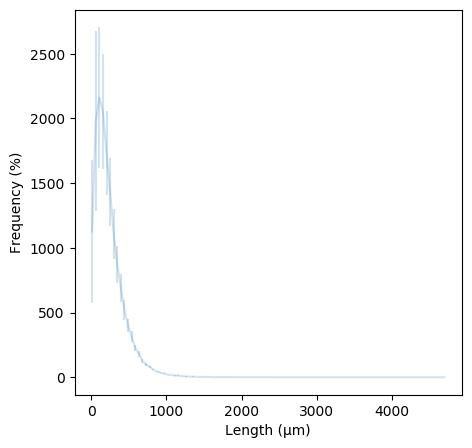

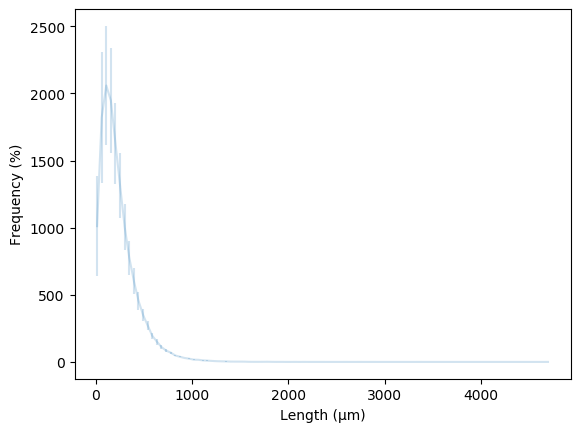

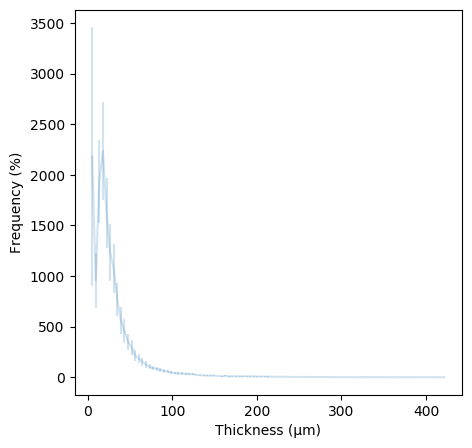

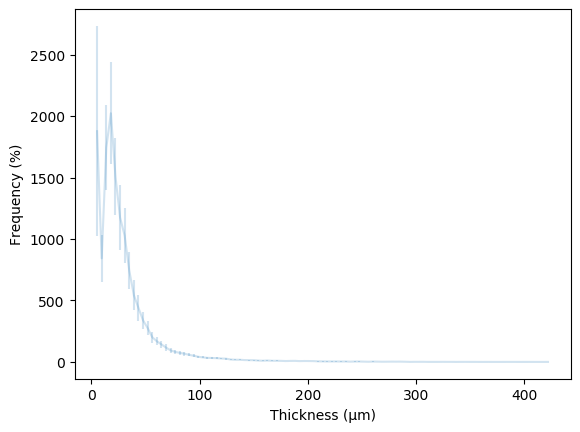

In [17]:
# load fileinfo
fileinfo = pd.read_csv(os.path.join(path, 'par', 'lung_file_idx.csv'))
# display(fileinfo)

make_individul_plots(ippath, oppath)
make_merged_plots(ippath, oppath)